# Support Vector Machine (SVM) : Visualizing Hyperplanes

**Notebook 3 of 4**

SVMs are powerful supervised machine learning algorithms that excel at classification and regression tasks. In this tutorial, we'll dive into data points that are so dispersed that it is not possible to separate them using a linear hyperplane.

This tutorial will leverage visual representations of datasets to explore how different kernel functions in the support vector machine (SVM) classifier influence the decision boundaries and margins learned by the model. Rather than relying solely on mathematical formulations and analysis, this visual approach provides a solid grasp of how different kernels impact the model's behavior, enabling you to make informed choices for your specific problem.

In Notebook 2 SVM: Kernels we saw how a **kernel** transforms a low-dimensional input data space into a higher dimensional space. It converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier because, assumptions of linearity do not often apply in real world datasets: like the phenomena the data points represent, data sets are messy: they contain random variations or errors, anomalies or complex nonlinear patterns. All of these complexities create "noise" in a data set that will impact the prediction accuracy of the machine learning algorythm.

In the context of SVMs, there are 4 popular kernels – `Linear kernel` (see Notebook 2 SVM: Kernels) `Polynomial kernel` and `Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`. 

In this tutorial, we will see how the kernel trick used with SVMs can help reduce the *curse of dimensionality* in high-dimensional spaces. Here's how:
- The curse of dimensionality refers to the exponential increase in volume associated with adding extra dimensions to a space. This makes data very sparse and difficult to model.
- By using a kernel, SVMs can map the data into a higher dimensional feature space without computing the coordinates explicitly.
- Common kernels like polynomial or Gaussian kernel allow modeling complex nonlinear decision boundaries.
- This provides a compact way to add higher order feature combinations that can capture meaningful patterns in the data.
- So even with large number of features, the kernel efficiently generates useful nonlinear features to avoid overfitting and improve generalization.
- This means SVMs can build good predictive models on high dimensional data where directly modeling all interactions between raw features would be infeasible.
- Regularization techniques used in SVMs also help avoid overfitting on high dimensional spaces.

So in summary, the kernel trick is a key advantage of SVMs that lets them scale effectively to high dimensions and learn robust decision boundaries from sparse data. This helps mitigate the curse of dimensionality. 

We will use the iris dataset contained in the sklearn libray.  Information about it can be found at this link [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

## Learning Objectives

Average time to complete: 30min

By the end of this tutorial you should be able to:

- Gain practical experience in implementing SVM kernels using a programming language like Python with scikit-learn.
- Understand the concept of kernel selection and tuning for optimal SVM performance.
- Through visualizations, gain insights into how `linear`, `polynomial`, and `radial basis function (RBF`) kernels separate classes and handle overlapping data distributions
- Develop a tangible understanding of how to effectively select and tune the kernel to enhance the SVM's classification performance on your data



## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package.
* numpy 
* seaborn 
* matplotlib
* requests
* ipywidgets
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it.

We also need to respect a few research data management best practices along the way, these best practices are recommended by the [Digital Research Alliance of Canada](https://zenodo.org/records/4000989). In earlier tutorials, we encouraged you to resepct these RDM best practices:

SAVE YOUR RAW DATA IN ORIGINAL FORMAT<br>
BACKUP YOUR DATA (3-2-1 rule)<br>
DESCRIBE YOUR DATA

These practices should apply in this tutorial as well, but we will also look at best practices of data deposit, so that you can preserve your data set, share it with others, and get credit for your work!

PRESERVE AND SHARE YOUR DATA

* Submit final data files to a repository assigning a persistent identifier (e.g. handles or DOIs)
* Provide good metadata for your data set so others can find it (use a common metadata standard, e.g. Darwin Core, DDI, etc.)

In Notebook 4 SVM: SVM + Random Forest, we will show you how to evaluate if you should publish a dataset and then, we will deposit a dataset from this tutorial series in Borealis (Dataverse), a repository that collects data sets published by researchers affiliated with Canadian universities.

# Kernels demonstrated through visualization
We will look at visualizing the boundaries in SVM linear and non-linear classification.  As in past tutorials, this helps us to better understand model complexity, potential for overfitting and overall insights into the SVM's decision-making process..Before getting started, let's do a review of the concepts covered in Notebook 1 SVM: Regularization.

#### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


#### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.

#### Margin

A margin is a perpendicular separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.
<img src="../MLTS_20240530_SVM_data/MLTS_20240530_SVM_Margin_1.0.png" style="float: left;" alt="" height="400" width="400"/><br><br>
    - Best optimized line(hyperplane) with maximum margin is termed as Margin Maximal Hyperplane (shown as solid line)<br>
    - Closest points where the margin distance is calculated are considered as the support vectors (shown as dotted lines)<br>
    - The 2 arrows denote the hyperplane. In this case it is maximized because it is between the closest data points.<br>
<br><br><br><br><br><br>  
There are two concepts that we will demonstrate: **Hard margin classification** in SVMs aims for perfect class separation with the widest possible margin. It works well for linearly separable data but is sensitive to outliers and can overfit when data isn't perfectly separable.<br>The second concept is **Soft margin classification** allows some misclassifications for a more robust model. It uses a slack variable and a hyperparameter `C` to balance margin maximization and error minimization. This approach is more practical for real-world, noisy datasets and helps prevent overfitting by tolerating some classification errors for better overall performance.
r>
#### Regularization
- Known as the 'C' parameter in Python SkLearn Library
- Optimises SVM classifier to avoid misclassifying the data
- C large -> Margin of hyperplane small
- C small -> Margin of hyperplane large
- Misclassification are possible:
    - A large C can lead to overfitting
    - A small C can lead to underfittingk?nLet's start by loading the libraries needed foe this tutorial. 


In [1]:
import warnings

warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from IPython.display import Image
import pandas as pd
%matplotlib inline
#print(float("inf"))

# Large margin classification

Large margin classification is a fundamental principle in machine learning, particularly in Support Vector Machines (SVMs). It aims to find a decision boundary that maximizes the distance (margin) between itself and the nearest data points of different classes. These nearest points are called support vectors. The concept is based on the idea that a boundary with a larger margin is likely to generalize better to unseen data, making the classifier more robust. In practice, perfect separation may not always be possible, so a "soft margin" approach allows for some misclassifications to achieve a better overall fit. The large margin principle can be extended to non-linear classification problems using kernel functions, which implicitly map the data to a higher-dimensional space where linear separation becomes possible. This approach helps create models that are less prone to overfitting and often perform well on high-dimensional data or when the number of dimensions exceeds the number of samples.

* If classes can clearly be separated easily with a straight line (they are linearly separable)
* The decision boundary of an SVM classifier; this line not only separates the classes but also stays 
as far away from the closest training instances as possible.
* The distances between nearest data point and hyper-plane(decision boundary) is called margin. if this margin is large then this is caled large margin classification.
* The nearest instances from decision boundary is called **support vector**.

### Let's first do a cursory exploration of the dataset

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Some datasets contain a lot of information about the data.  This information is divided into column headings also known as keys.  This iris dataset contains 8 keys as shown above.
<br>
The line below shows the data type for the iris feature measurement `data`.  Is it float64 which mean decimal point format and there are 150 entries. Those entries are the iris flower features: sepal length and width and petal length and width.

In [3]:
datatypes_features = pd.DataFrame(iris.data)
datatypes_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Next, we look at the `target` field which is the type of iris.  In this field, the data type is int32 meaning that it is numerical and represents the name of the different types of iris flowers: Setosa, Versicolor and Virginica.

In [5]:
datatypes_target = pd.DataFrame(iris.target)
datatypes_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


The `target names` are type object meaning that they are text format such as `Setosa`, `Versicolor` and `Virginica`.

In [6]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
datatypes_target_names = pd.DataFrame(iris.feature_names)
datatypes_target_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes


As shown below, we also notice that the different iris species are in a field `target` and represented in numerical format.  It is often easier to work with numerical values when using python math libraries like pandas or numpy and this dataset already has a field where `Setosa`, `Versicolor` and `Virginical` are coded as `0`, `1` and `2` respectively.

In [10]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Visualizing Linear classification

When visualizing linear classification, a straight line (in 2D) or hyperplane (in higher dimensions) separates the classes classes.
Linear SVMs use a straight decision boundary to separate classes. In visualizations, this appears as a line dividing the feature space. It works well when the data is linearly separable or close to it. The visualization shows a clear, simple boundary between classes, making it easy to interpret. However, it struggles with data that has complex, non-linear relationships between features.



Let's set up our linear SVM classfier. For clarity purposed, we start by setting up our classfier as follows:
- Start with **Setosa and Versicolor species only** because we know they are more easily distinguisable by the petal length and width (See analysis from Decision Trees Tutorial).

In [11]:
X = iris["data"][:, (2, 3)] # columns 2, 3 of the iris["data"] array are the petal length and width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e9)
svm_clf.fit(X, y)

SVC(C=1000000000.0, kernel='linear')

Let's just make sure that our data is only for the Setosa (0) and Versicolor (1) species.

In [12]:
print("Number of entries for Setosa and Versicolor:",len(y),"\n")
print("Setosa(0) and Versicolor(1):",y,"\n")

Number of entries for Setosa and Versicolor: 100 

Setosa(0) and Versicolor(1): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 



Looks good so far.
We start with a Python sub-routine called "plot_svm_decision_boundary" that draws the support vectors of the classifier.

In [13]:
def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    x0 = np.linspace(xmin, xmax, 200)
    a = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    svs = svm_clf.support_vectors_
    decision_boundary = -a[0]/a[1] * x0 - b/a[1]
    margin = 1/a[1]
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#f44336')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, decision_boundary + margin, "k:", linewidth=2)
    plt.plot(x0, decision_boundary - margin, "k:", linewidth=2)

Next, we plot the Setosa and Versicolor points and vectors in a graph template.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


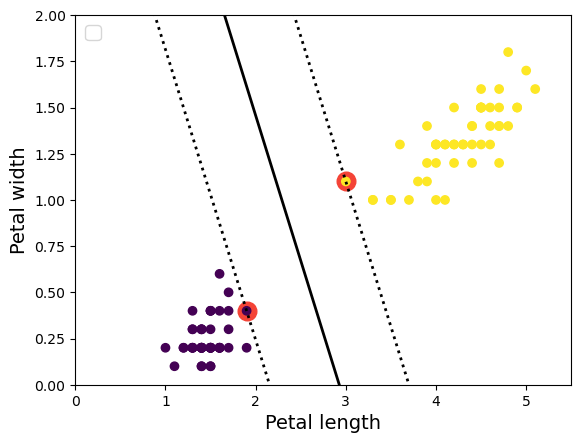

In [14]:
plot_svm_decision_boundary(svm_clf, 0, 5.5)
x = plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
x =plt.axis([0, 5.5, 0, 2])

### Hard margin vs soft margin

* If we strictly impose that all instances be off the street and on the right side, this is called **hard margin classification**.
  * There are two main issues with hard margin classification.
      * it only works if the data is linearly separable.
      * it is quite sensitive to outliers.
* If data is not linearly separable or it had outliers, it is preferable to use a more flexible model. 
* The objective is to find a good balance between keeping the street as large as possible and limiting the margin
violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called **soft margin classification**.
* we can get this balance by varing **'C'** hyperparameter.

\begin{array}{|c|c|}
\hline control**C** & street margin  \\\hline
    Low & high margin \\\hline
   High & low margin \\\hline
\end{array}

**A solution to the complexity problem**<br>
In our Decision Trees tutorial, Virginica and Versicolor species have some overlap especially for the charts involving sepal measurements. But how big of a challenge am I going to have to distingush these 2?  We were able to distinguish the classes better with Random Forest but it's not alway the case.  SVMs are a better a better fit when the relationships are complex between features.  This the case between `Virginica` and the other 2 species.  Next we want to show how we can combine two easily distinguishable feature (`Setosa` and 'Versicolor') and run an SVM classifier on the newly `combined` feature with `Virginica` to help correct the complexity problem.  This is referered to as `feature engineering` and it is a useful technique to overcome complexity in the datasets without necessarily resorting to more complex classifier models.
<br>
Now we will add Virginica but Setosa and Versicolor will be grouped together.  We still have only two ***classes***.

In [15]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [17]:
print("Number of entries for Setosa and Versicolor:",len(y),"\n")
print("Setosa / Versicolor - Combined(0) and Virginical(1):",y,"\n")

Number of entries for Setosa and Versicolor: 150 

Setosa / Versicolor - Combined(0) and Virginical(1): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.] 



The 2 classes now are Setosa/Versicolor(Combined as 0) and Virginical (1)

Below is a test of our SVM classifer.  With the petal width and petal length and know class it belongs to, we are simply verifying that the class prediction match the true value.

In [18]:
print("We expect 0:",svm_clf.predict([[4.9, 1.5]]), "\n") # Belongs to the Setosa and Versicolor(0) class

print("We expect 1:",svm_clf.predict([[5.4, 2.3]]), "\n") # Belongs to the Virginica(1) class

We expect 0: [0.] 

We expect 1: [1.] 



### Result

High `C` values results in fewer margin violations but a smaller margin, potentially leading to overfitting. Conversely, a low `C` value produces a larger margin but allows more instances within or on the wrong side of the margin. The classifier with the lower `C` value is likely to generalize better, as it makes fewer prediction errors even on the training set, with most margin violations still on the correct side of the decision boundary. This highlights that SVMs offer greater flexibility in class delineation compared to Decision Trees and Random Forests, achieved through the adjustment of a single parameter, `C`. This flexibility allows for fine-tuning of the trade-off between margin size and classification accuracy.

Our classifier is working. Now let's run it with difference values of `C` to visualize the effect on the classfier's ability to distinguish the classes. We will first set up 2 classifiers with 2 different values of `C` (1 and 100), then train the 2 of them on our dataset using the fit() function.

In [19]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

Note: using the Pipeline in Python is used as a way to keep the code organized
In the following 2 cells, we do 2 things:<br>
* First, we adjust the SVM models to account for feature scaling and explicitely identifying support vectors, which are useful for visualizing the SVM's model decision boundary
* Then, the visualization compares the decision boundary for different `C` values 


In [20]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

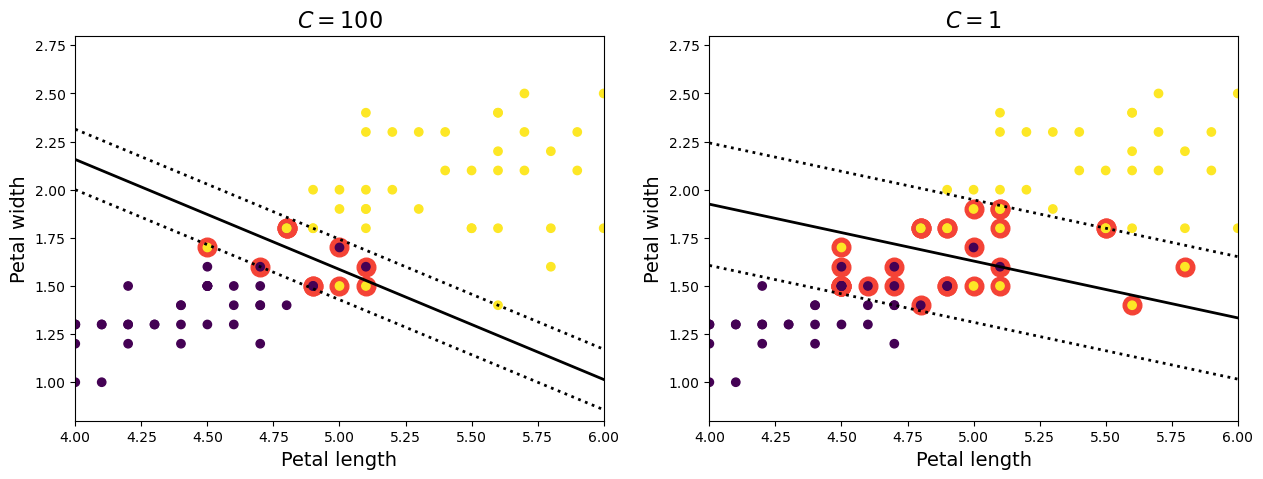

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(122)
plot_svm_decision_boundary(svm_clf1, 4, 6)
plt.scatter(X[:,0],X[:,1], c=y)
plt.axis([4, 6, 0.8, 2.8])
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)

plt.subplot(121)
plot_svm_decision_boundary(svm_clf2, 4, 6)
plt.scatter(X[:,0],X[:,1], c=y)
x =plt.axis([4, 6, 0.8, 2.8])
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
x= plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)


**Conclusion:**
 * On the left, using a high C value the classifier makes fewer margin violations but ends up with a smaller margin. 
 * On the right, using a low C value the margin is much larger, but many instances end up on the street. 
   * it seems likely that the this classifier will generalize better: in fact even on this training set it makes fewer prediction errors, since most of the margin violations are actually on the correct side of the decision boundary.
 * Compared with Decision Trees and Random Forest, SVM allows us greater flexibiliy to delineate the classes by the use of a single parameter `C`.

# Visualizing Non-linear classification

In visualizing non-linear classfications, curved or complex-shaped decision boundaries separate classes. Non-linear SVMs use kernels (like polynomial or radial basis function) to transform the feature space, allowing for curved or complex decision boundaries. In visualizations, this appears as non-straight lines or curves separating classes. These kernels can capture more complex relationships in the data, fitting around clusters or following intricate patterns. The visualization often shows how the SVM can adapt to data that isn't linearly separable, wrapping around class distributions or creating isolated regions. While more flexible, these boundaries can be harder to interpret and may risk overfitting if not properly tuned.

In some case datasets are not even close to being linearly separable.  As a straight line can't distinguish the classes, we need another technique that allows "curvature" through the classes of the dataset.  SVMs provide a means of implementing such a thing using mathematical transformations. Those techniques are summarized by:

**Techniques to tackle nonlinear problems**:
* add more features, such as polynomial features by mathematical transformation
* add features computed using a similarity function.

### 1) Add more features, such as polynomial features

In this implementation of the polynomial features technique, we'll transform our original feature space into a higher-dimensional space using polynomial combinations of the input features. This transformation will allow our linear SVM model to capture non-linear relationships in the data, effectively creating a non-linear decision boundary in the original feature space. After applying this transformation, we'll train our SVM classifier on the expanded feature set. This approach enables us to use the computational efficiency of linear SVMs while still modeling complex, non-linear relationships in the data. We'll then visualize the results to observe how the polynomial feature expansion affects the decision boundary and classification performance.


**Please note:** We are now using a new dataset within SkLearn wich allows us to introduce some noise to create non-linearity. It is the make_moons datasets built into the sklearn library package.

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

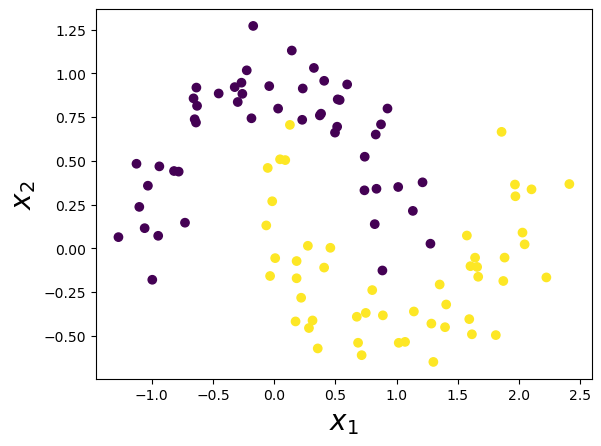

In [27]:
x = plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel(r"$x_1$", fontsize=20)
x =plt.ylabel(r"$x_2$", fontsize=20)

Note: SkLearn has a lor of useful features to visualize the flow of code.  Using the Pipeline in Python is used as a way to keep the code organized and shows the flow of the modeling process: polynomila feature of degree 3, scaling of the polynomial and classifier creation.  We first set up the SVM classifier and then train it on the data using the fit() function.


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

The visualization shows the decision boundary for the newly created classfier.

In [29]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X1 = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X1).reshape(x0.shape)
    y_decision = clf.decision_function(X1).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred,cmap=plt.cm.brg, alpha=0.1)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


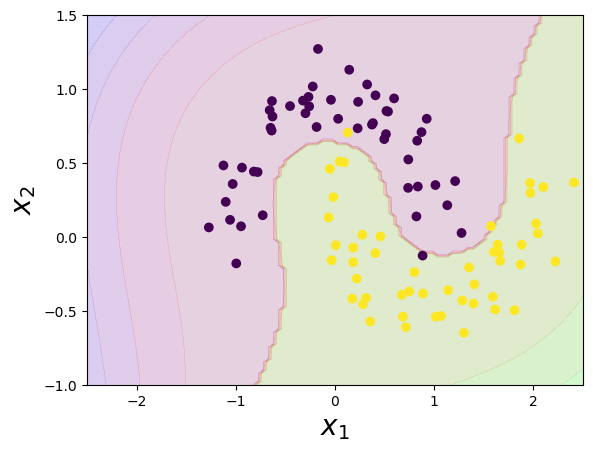

In [30]:
plot_predictions(polynomial_svm_clf, [-2.5, 2.5,-1.0,1.5])
x = plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel(r"$x_1$", fontsize=20)
x =plt.ylabel(r"$x_2$", fontsize=20)

With non-linear kernels, the data is implicitly mapped to a higher and theoretically infinite number of dimentional spaces or hyperplanes.  The different shades represents the hyperplanes modeled by the SVC function in order to separate the classes.

#### Polynomial Kernel

* Adding polynomial features is simple to implement and can work great with all sorts of
Machine Learning algorithms.
* low polynomial degree cannot deal with very complex datasets.
* high polynomial degree creates a huge number of features, making the model too slow

* Fortunately, when using **SVMs** you can apply an almost miraculous mathematical technique called the kernel trick.
* It makes it possible to get
the same result as if you added many polynomial features, even with very high-degree
polynomials, **without actually having to add them**.

Using the Pipeline in Python, we show the flow of the modeling process: polynomial feature of degree 3, scaling of the polynomial and classifier creation.  We first set up the SVM classifier and then train it on the data using the fit() function. We will compare for different parameter values `d`, `r` and `C`.

In [31]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [32]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Let's plot the boundaries for the two classifiers classifiers with polynomial kernels

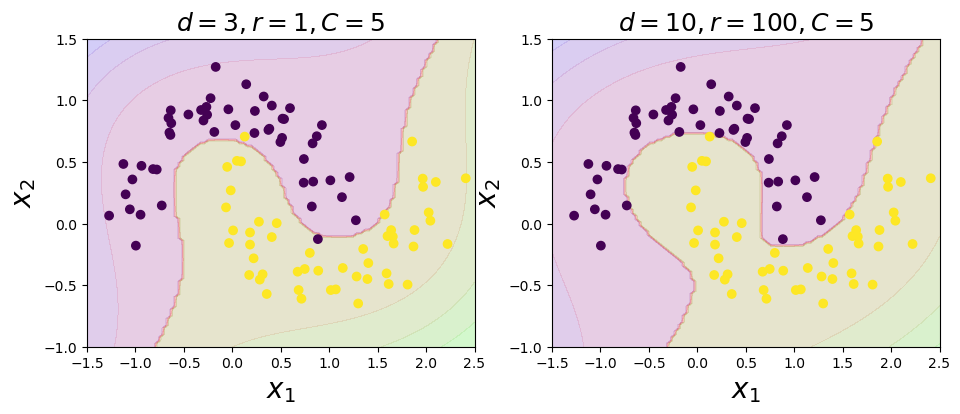

In [33]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5,-1.0,1.5])
plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5,-1.0,1.5])
plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
x =plt.title(r"$d=10, r=100, C=5$", fontsize=18)

The d=3 plot shows a smoother, more generalized curve whereas the d=10 plot display more complex, wiggly boundaries that wrap more tightly around data points. The d=10 model might perform better on the training data but could struggle with generalization to new data, while the d=3 model would likely offer a better balance between fitting the data and maintaining generalization ability. The key points are as follows: <br>
*  if your model is overfitting, you might want to reduce teh
polynomial degree<br>
* if it is underfitting, you can try increasing it.<br><br>
The hyperparameter **coef0** or `r` on the charts  controls how much the model is influenced by high-degree
polynomials versus low-degree polynomials. Polynomial kernel has one issue, with p->inf, it more and more separates pairs of points, for which <x,y> is smaller than 1 and <a,b> with bigger value. This is because powers of values smaller than one gets closer and closer to 0, while the same power of value bigger than one grows to infinity. You can use coef0 to "scale" your data so there is no such distinction.

### 2) Adding Similarity Features - Introduction to the Gamma (γ) parameter

##### Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark.

* **Gaussian Radial Basis Function (RBF)**: Define the similarity function. It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).
* The simplest approach is to create a landmark at the location of each and every instance in the dataset.This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable.
* The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features (original dataset is drop)



##### To summarize, Gamma:

 * The gamma parameter in SVMs determines how much influence the distance between data points has on shaping the decision boundary.  * Low gamma -> points far from the line are considered for calculation - similar.<br>
  * High gamma -> points close to the line are considered for calculation – non-similar
  
  <img src="../MLTS_20240530_SVM_data/MLTS_20240530_SVM_Gamma_1.0.png" style="float: left;" alt="" height="600" width="600"/>
  <br><br><br><br><br><br><br><br><br><br><br>
  In Fig. 1, Gamma has a <b>high</b> value.<br>
  In Fig. 2, Gamma has a <b>low</b> value
  <br>>
 	The gamma parameter in SVMs determines how the distance between data points affects the decision boundary. A higher gamma value results in a more complex boundary that is more sensitive to nearby data points, allowing for tighter, more localized decision regions as shown in figure 1. Conversely, a lower gamma value creates a smoother, more general boundary that is less influenced by individual data points, even those far from the boundary as shown in figure 2. Essentially, gamma controls the trade-off between a decision boundary that captures broad patterns in the data and one that adapts more closely to specific data points. 

The purpose of the following code is to visually compare how different combinations of `gamma` and `C` affect the SVM's decision boundary and classification performance. This allows for an intuitive understanding of how these hyperparameters influence the model's behavior, particularly:* How `gamma` affects the "reach" or influence of each training exampl
* How `C` balances between maximizing the margin and minimizing classification error
	This visualization is crucial for understanding hyperparameter tuning in SVMs and how to choose appropriate values for different datasets.


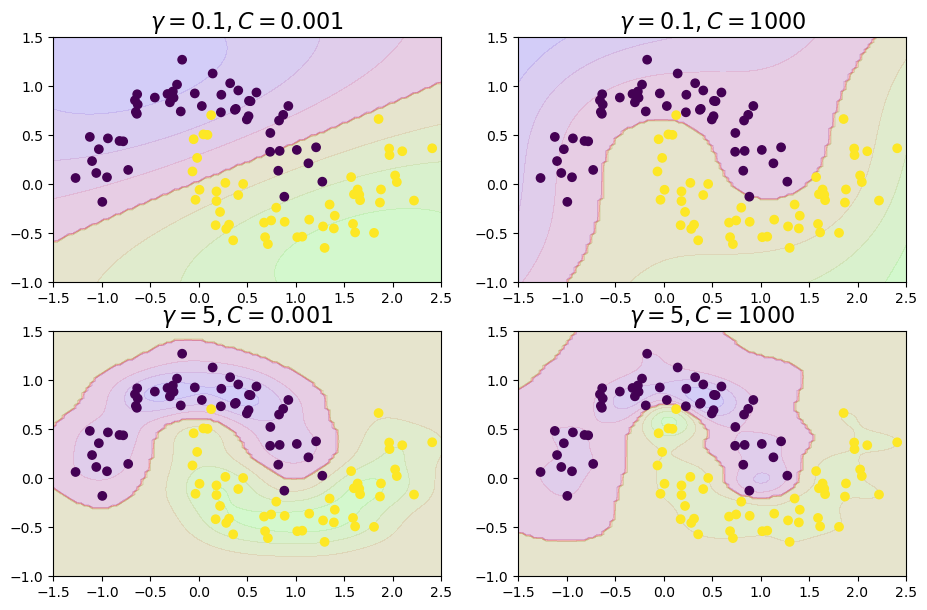

In [34]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plt.scatter(X[:,0],X[:,1], c=y)
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

In the plots above, you will observe that:
 - With a low `C` (0.001), the decision boundary is smooth and potentially simpler, and some misclassifications are tolerated
 - With a high `C` (1000), the decision boundary is more complex, trying to correctly classify more points
 - With a low `gamma` (γ=0.1), the decision boundary does not bend to the whims of individual points, leading to a more general classification
 - With a high `gamma` (γ=5), the decision boundary bend and twists to classify the training points correctly, which may capture noise and lead to overfitting.
 
We notice that each class needs more than 1 hyperplane. How did we notice that we have more than 1 hyperplane? By looking at each class, we can see that it is scattered across different shades of it assigned colour.  For example, the dark purple points are scattered across violet and pink shaded planes.  This could be a sign of overfitting the classed too finely.

### More about hyperparameter 'gamma':
* The other plots show models trained with different values of hyperparameters gamma (γ) and C. 
* Increasing gamma makes the bell-shape curve narrower , and as a result each instance’s range of influence is smaller: the decision boundary ends up being more **irregular**, wiggling around individual instances. 
* If small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up **smoother**.
* γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it

\begin{array}{|c|c|c|}
\hline control(gamma)) & bell shape & Toward Fitting  \\\hline
    Increase & narrow & over fit \\\hline
   Derease & wide & under fit \\\hline
\end{array}

## Conclusion

So in summary, the kernel trick is a key advantage of SVMs that lets them scale effectively to high dimensions and learn robust decision boundaries from sparse data. This helps mitigate the *curse of dimensionality.* 

Support vector machine (SVM) models are one of the powerful machine learning algorithms that are used extensively by data scientists and machine learning practitioners. The reason for that is its capability for linear and nonlinear classification and regression. It could be used for different datasets, such as text and images. SVMs are well suited for classification problems with small and medium-sized datasets. The main reason for this is that it has high training complexity, which will require high training time and energy. Therefore, it will be only computationally efficient for a small and medium-sized datasets.

SVM models are generally NOT considered to be highly interpretable or easy to explain:
* The decision boundary in the original input space can end up being highly complex and nonlinear
* SVMs are sensitive to individual training instances, especially support vectors. So, the model can be skewed by outliers.
* Their decisions aren't very easy to interpret
* Can't estimate the probability that an instance belongs to a particular class k.

In this tutorial we explored through visual representation, the benefits of using linear and polynomial kernels in handling linearily and non-linearily separable datasets with SVM classifiers. In particular, we :
- Explored how SVMs can map the data into a higher dimensional feature space without computing the coordinates explicitly.
- Implemented common kernels like the polynomial kernel allowing modeling complex nonlinear decision boundaries.
- Used regularization techniques to help avoid overfitting on high dimensional spaces.

In the next notebook, we will see how we can combine the direct control offered by SVM parameters for complex datasets while getting the robustness from Random Forest classifiers when outliers and noise are significant.

## Please proceed to Notebook 4 SVM: Combining Random Forest and SVM models for Enhanced Performance